In [5]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head(3)


,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,0.22,0.63,0.08,0.04,Iris-setosa
1,0.17,0.42,0.35,0.04,Iris-setosa
2,0.11,0.50,0.13,0.04,Iris-setosa


In [6]:
df['種類'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
syurui = df['種類'].unique()
syurui[0]


'Iris-setosa'

In [8]:
df['種類'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 種類, dtype: int64

In [9]:
df.tail(3)


,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
147,0.61,0.42,NaN,0.79,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


In [10]:
df.isnull()

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,True,False,False
148,False,False,False,False,False


In [11]:
df.isnull().any(axis = 0)

がく片長さ     True
がく片幅      True
花弁長さ      True
花弁幅       True
種類       False
dtype: bool

In [12]:
df.sum()

がく片長さ                                                62.29
がく片幅                                                 65.62
花弁長さ                                                 72.04
花弁幅                                                  66.22
種類       Iris-setosaIris-setosaIris-setosaIris-setosaIr...
dtype: object

In [13]:
tmp = df.isnull()
tmp.sum()

がく片長さ    2
がく片幅     1
花弁長さ     2
花弁幅      2
種類       0
dtype: int64

In [14]:
df2 = df.dropna(how='any', axis=0)
df2.tail(3)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
146,0.56,0.21,0.69,0.46,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


In [15]:
df.isnull().any(axis=0)

がく片長さ     True
がく片幅      True
花弁長さ      True
花弁幅       True
種類       False
dtype: bool

In [16]:
df['花弁長さ'] = df['花弁長さ'].fillna(0)
df.tail(3)


,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
147,0.61,0.42,0.00,0.79,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


In [17]:
df.mean()

C:\Users\yoshikoshi\AppData\Local\Temp\ipykernel_5732\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


がく片長さ    0.420878
がく片幅     0.440403
花弁長さ     0.480267
花弁幅      0.447432
dtype: float64

In [18]:
df['がく片長さ'].mean()

0.42087837837837844

In [19]:
df.std()

C:\Users\yoshikoshi\AppData\Local\Temp\ipykernel_5732\3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


がく片長さ    0.228910
がく片幅     0.181137
花弁長さ     0.236909
花弁幅      0.309960
dtype: float64

In [22]:
df = pd.read_csv('iris.csv')
colmean= df.mean()
df2=df.fillna(colmean)
df2.isnull().any(axis=0)

C:\Users\yoshikoshi\AppData\Local\Temp\ipykernel_5732\3011718624.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  colmean= df.mean()


がく片長さ    False
がく片幅     False
花弁長さ     False
花弁幅      False
種類       False
dtype: bool

In [23]:
xcol=['がく片長さ','がく片幅','花弁長さ','花弁幅']
x=df2[xcol]
t=df2['種類']

In [33]:
from sklearn import tree
model=tree.DecisionTreeClassifier(max_depth=2,random_state=0)

In [34]:
model.fit(x,t)
model.score(x,t)

0.94

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,t,test_size=0.3,random_state=0)


In [36]:
print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


In [37]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9555555555555556

In [38]:
import pickle
with open('irismodle.pkl','wb') as f:
    pickle.dump(model, f)

In [39]:
model.tree_.feature

array([ 3, -2,  3, -2, -2], dtype=int64)

In [40]:
model.tree_.threshold

array([ 0.275, -2.   ,  0.69 , -2.   , -2.   ])

In [41]:
print(model.tree_.value[1])
print(model.tree_.value[3])
print(model.tree_.value[4])

[[34.  0.  0.]]
[[ 0. 31.  6.]]
[[ 0.  1. 33.]]


In [42]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

[Text(0.4, 0.8333333333333334, 'kaben_haba <= 0.275\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'kaben_haba <= 0.69\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]')]

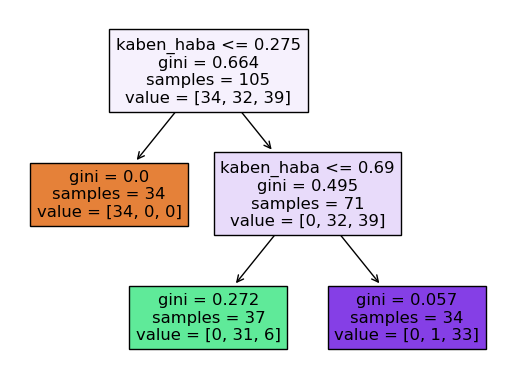

In [43]:
x_train.columns=['gaku_nagasa','gaku_haba','kaben_nagasa','kaben_haba']
from sklearn.tree import plot_tree
plot_tree(model,feature_names=x_train.columns,filled=True)